In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pylab as plt

In [96]:
vetor_x = np.array([sc.cos(x) for x in np.linspace(0, 120, 28*28*10000)])

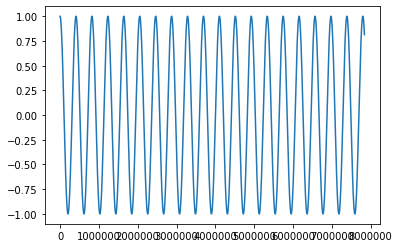

In [97]:
plt.plot(vetor_x)

In [98]:
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import tensorflow as tf


In [99]:
latent_dim = 16

class Autoencoder(Model):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


autoencoder = Autoencoder(latent_dim)

In [100]:
autoencoder.compile(optimizer='adam', loss='mae')


In [101]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(vetor_x.reshape(28,28,10000).T)

In [102]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

print (x_train.shape)
print (x_test.shape)


(7500, 28, 28)
(2500, 28, 28)


In [103]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 7500 samples, validate on 2500 samples
Epoch 1/100
7500/7500 [==============================] - 1s 97us/sample - loss: 0.3681 - val_loss: 0.3286
Epoch 2/100
7500/7500 [==============================] - 1s 125us/sample - loss: 0.3256 - val_loss: 0.3224
Epoch 3/100
7500/7500 [==============================] - 1s 114us/sample - loss: 0.3206 - val_loss: 0.3192
Epoch 4/100
7500/7500 [==============================] - 1s 103us/sample - loss: 0.3190 - val_loss: 0.3187
Epoch 5/100
7500/7500 [==============================] - 1s 89us/sample - loss: 0.3185 - val_loss: 0.3184
Epoch 6/100
7500/7500 [==============================] - 1s 82us/sample - loss: 0.3184 - val_loss: 0.3183
Epoch 7/100
7500/7500 [==============================] - 1s 111us/sample - loss: 0.3183 - val_loss: 0.3182
Epoch 8/100
7500/7500 [==============================] - 1s 117us/sample - loss: 0.3182 - val_loss: 0.3182
Epoch 9/100
7500/7500 [==============================] - 1s 85us/sample - loss: 0.3181 - val_loss: 

Epoch 77/100
7500/7500 [==============================] - 1s 108us/sample - loss: 0.3176 - val_loss: 0.3179
Epoch 78/100
7500/7500 [==============================] - 1s 111us/sample - loss: 0.3176 - val_loss: 0.3177
Epoch 79/100
7500/7500 [==============================] - 1s 101us/sample - loss: 0.3176 - val_loss: 0.3176
Epoch 80/100
7500/7500 [==============================] - 0s 57us/sample - loss: 0.3176 - val_loss: 0.3175
Epoch 81/100
7500/7500 [==============================] - 1s 77us/sample - loss: 0.3176 - val_loss: 0.3176
Epoch 82/100
7500/7500 [==============================] - 1s 92us/sample - loss: 0.3176 - val_loss: 0.3176
Epoch 83/100
7500/7500 [==============================] - 1s 121us/sample - loss: 0.3176 - val_loss: 0.3175
Epoch 84/100
7500/7500 [==============================] - 1s 107us/sample - loss: 0.3176 - val_loss: 0.3176
Epoch 85/100
7500/7500 [==============================] - 1s 95us/sample - loss: 0.3176 - val_loss: 0.3176
Epoch 86/100
7500/7500 [========

In [104]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()


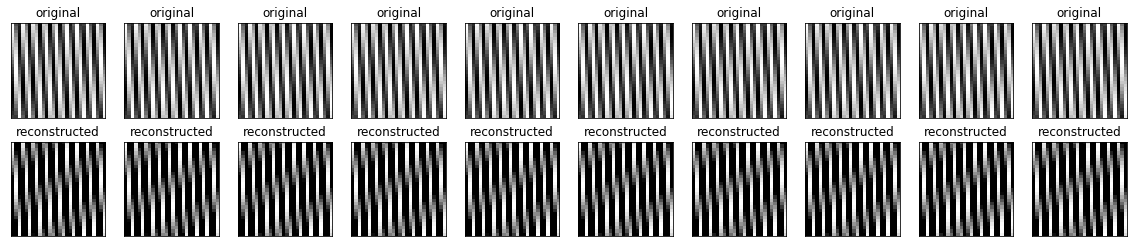

In [105]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


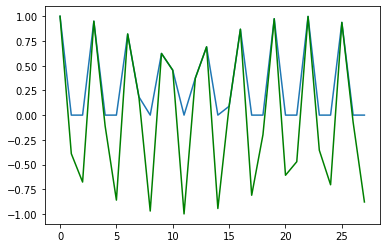

In [106]:
plt.plot(decoded_imgs[0][0])
plt.plot(x_test[0][0], c='g')